# <b>Fondamenti di Analisi Dati</b> - a.a. 2020/2021

## 4 <b>Pandas</b>

Pandas è una libreria di alto livello che mette a disposizione diversi strumenti e strutture dati per l'analisi dei dati. In particolare, Pandas è molto utile per manipolare e visualizzare i dati in maniera veloce prima di passare all'analisi vera e propria.<br>
Le due strutture dati principali di Pandas sono le <i>Series</i> e i <i>DataFrame</i>.

### 4.1 Series

Una <b>Series</b> è una struttura monodimensionale (una serie di dati) molto simile a un array di NumPy che consente di indicizzare gli elementi mediante etichette (oltre che con i numeri). I valori contenuti in una serie possono essere di qualsiasi tipo.

In [2]:
import pandas as pd
s1 = pd.Series([7,5,2,8,9,6])
print(s1)

0    7
1    5
2    2
3    8
4    9
5    6
dtype: int64


I numeri visualizzati sulla sinistra rappresentano le etichette dei valori contenute nella serie che di default sono di tipo numerico e
sequenziale. Durante la definizione di una serie è possibile specificare le proprie etichette (una per ogni valore).

In [8]:
valori = [7,5,2,8,9,6]
etichette = ['a','b','c','d','e','f']
s2 = pd.Series(valori, index=etichette)
print(s2)
print(s2['a':'c'])

a    7
b    5
c    2
d    8
e    9
f    6
dtype: int64
a    7
b    5
c    2
dtype: int64


Possiamo definire una serie anche mediante un dizionario, specificando contemporaneamente etichette e valori.

In [11]:
s3=pd.Series({'a1':5,'a2':12,'n':94})
print(s3)

a1     5
a2    12
n     94
dtype: int64


È possibile assegnare un nome alla serie.

In [4]:
pd.Series([1,2,3], name='Serie I')

0    1
1    2
2    3
Name: Serie I, dtype: int64

#### 4.1.1 Indicizzazione e slicing

Quando gli indici sono numerici, le serie possono essere indicizzate come gli array di numpy.

In [9]:
print(s1[0],"\n") #indicizzazione
print(s1[0:4:2]) #slicing

7 

0    7
2    2
dtype: int64


Quando gli indici sono delle etichette personalizzate l'indicizzazione avviene in maniera simile, ma non è possibile utilizzare lo slicing.

In [13]:
print(s3['a2'])
s3['nuovo']=5
print(s3)


12
a1        5
a2       12
n        94
nuovo     5
dtype: int64


Anche per le serie è possibile modificare i valori tramite indicizzazione.

In [7]:
s3['a2'] = 9
print(s3)

a1     5
a2     9
n     94
dtype: int64


Se l'indice specificato non esiste, verrà creato un elemento nuovo.

In [8]:
s3['b1']=-23
print(s3)

a1     5
a2     9
n     94
b1   -23
dtype: int64


Possiamo specificare più etichette contemporaneamente tramite lista (di etichette).

In [9]:
print(s3[['a1','b1','n']]) #l'argomento passato alla serie è una lista di etichette (con un ordine da noi definito)

a1     5
b1   -23
n     94
dtype: int64


Le serie con etichette alfanumeriche possono essere indicizzate anche seguendo l'ordine in cui i dati sono inseriti nella serie. Per bypassare le etichette e utilizzare l'indice numerico utilizziamo il metodo <b>iloc</b>.

In [15]:
print(s2,'\n')
print("Elemento di indice 'a':",s2['a'])
print("Primo elemento della serie:",s2.iloc[1])

a    7
b    5
c    2
d    8
e    9
f    6
dtype: int64 

Elemento di indice 'a': 7
Primo elemento della serie: 5


In certi casi può essere utile ripristinare la numerazione degli indici tramite il metodo <b>reset_index</b>.

In [16]:
print(s3,'\n')
print(s3.reset_index(drop=True)) #drop=True indica di scartare i vecchi indici

a1        5
a2       12
n        94
nuovo     5
dtype: int64 

0     5
1    12
2    94
3     5
dtype: int64


Le serie ammettono anche l'indicizzazione logica.

In [17]:
print(s1,'\n') #serie s1
print(s1>2,'\n') #indicizzazione logica per selezionare gli elementi maggiori di 2
print(s1[s1>2],'\n') #applicazione dell'indicizzazione logica

0    7
1    5
2    2
3    8
4    9
5    6
dtype: int64 

0     True
1     True
2    False
3     True
4     True
5     True
dtype: bool 

0    7
1    5
3    8
4    9
5    6
dtype: int64 



Si può specificare la combinazione tra due condizioni tramite gli operatori logici <code>|</code> (or) e <code>&</code> (and), ricordando di racchiudere gli operandi tra parentesi tonde.

In [18]:
print(s1,"\n")
print((s1>2) & (s1<6),"\n")
print(s1[(s1>2) & (s1<6)])

0    7
1    5
2    2
3    8
4    9
5    6
dtype: int64 

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool 

1    5
dtype: int64


In [14]:
print(s1,"\n")
print((s1<2) | (s1>5),"\n")
print(s1[(s1<2) | (s1>5)])

0    7
1    5
2    2
3    8
4    9
5    6
dtype: int64 

0     True
1    False
2    False
3     True
4     True
5     True
dtype: bool 

0    7
3    8
4    9
5    6
dtype: int64


Come nel caso degli array di NumPy, l'allocazione della memoria è gestita dinamicamente per le Serie. Pertanto, se assegno una serie ad
una nuova variabile e modifico la seconda variabile, verrà modificata anche la prima.

In [20]:
s11=pd.Series([1,2,3],index=["a","b","c"])
s12=s11
s12[0]=-1
print(s11)

a   -1
b    2
c    3
dtype: int64


Per ottenere una nuova serie indipendente è necessario usare il metodo <code>copy</code>.

In [16]:
s11=pd.Series([1,2,3])
s12=s11.copy()
s12[0]=-1
print(s11)

0    1
1    2
2    3
dtype: int64


#### 4.1.2 Tipi di dati

Le <i>Series</i> possono contenere diversi tipi di dati.

In [17]:
pd.Series([2.5,3.4,5.2])

0    2.5
1    3.4
2    5.2
dtype: float64

Ad una serie viene associato un unico tipo di dato. Se specifichiamo dati di tipi eterogenei, la serie sarà di tipo <i>object</i>.

In [18]:
s=pd.Series([2.5,'A',5.2])
print(s)

0    2.5
1      A
2    5.2
dtype: object


È possibile cambiare il tipo di dato di una serie al volo con <code>astype</code> in maniera simile a quanto avviene con gli array di NumPy.

In [26]:
s=pd.Series([2,3,8,9,12,45])
print(s,"\n")
print(s.astype(float))
ss=list(filter(lambda x:x*2,list(s)))
type(ss)

0     2
1     3
2     8
3     9
4    12
5    45
dtype: int64 

0     2.0
1     3.0
2     8.0
3     9.0
4    12.0
5    45.0
dtype: float64


list

In [20]:
s1=pd.Series(['1','2'])
print(s1,"\n")
print(s1.astype(int))

0    1
1    2
dtype: object 

0    1
1    2
dtype: int32


In [27]:
s=pd.Series([3.2,'Ciao',7]) #Attenzione: non sempre è possibile cambiare il "tipo"
print(s.astype(int))

ValueError: invalid literal for int() with base 10: 'Ciao'

#### 4.1.3 Operazioni

Sulle serie sono definite le principali operazioni presente per gli array di numpy.

In [28]:
s = pd.Series([2,7,4,8,3,3,2,9,8,5,9])
print("Min:",s.min())
print("Max:",s.max())
print("Mean:",s.mean())

Min: 2
Max: 9
Mean: 5.454545454545454


È possibile ottenere la dimensione di una serie mediante la funzione <code>len</code>.

In [29]:
print(len(s))

11


Per conoscere i valori di una serie esclusi i duplicati utilizziamo il metodo <code>unique</code>.

In [24]:
print("Unique:",s.unique()) #restituisce i valori univoci

Unique: [2 7 4 8 3 9 5]


Per conoscere il numero di valori univoci in una serie, possiamo utilizzare il metodo <code>nunique</code>.

In [30]:
s.nunique()

7

È possibile ottenere i valori univoci di una serie insieme alle frequenze con le quali essi appaiono nella serie mediante il metodo
<code>value_counts</code>.

In [36]:
import numpy as np
tmp = pd.Series(np.random.randint(0,10,100))
print(tmp.unique()) #valori univoci
tmp.value_counts() #valori univoci con relative frequenze
#print(tmp)

[7 5 0 1 4 2 8 9 6 3]


7    19
4    14
5    12
0    11
6     9
2     9
8     7
3     7
9     6
1     6
dtype: int64

Il risultato di <code>value_counts</code> è una <code>Series</code> in cui gli indici rappresentano i valori univoci, mentre i valori sono le frequenze con cui essi appaiono nella serie. La serie è ordinata per valori.

Il metodo <code>describe</code> permette di calcolare diverse statistiche dei valori contenuti nella serie.

In [34]:
tmp.describe()

count    100.000000
mean       4.020000
std        2.828356
min        0.000000
25%        1.750000
50%        4.000000
75%        6.000000
max        9.000000
dtype: float64

In [28]:
perc =[.20, .40, .60, .80]
tmp.describe(percentiles=perc)

count    100.000000
mean       4.240000
std        2.640477
min        0.000000
20%        2.000000
40%        3.000000
50%        4.000000
60%        5.000000
80%        6.200000
max        9.000000
dtype: float64

Nel caso in cui alcuni indici dovessero essere mancanti, le caselle corrispondenti verranno riempite con <code>NaN</code> (not a number).

In [29]:
s1 = pd.Series([1,4,2], index = [1,2,3])
s2 = pd.Series([4,2,8], index = [0,1,2])
print(s1,'\n')
print(s2,'\n')
print(s1+s2)

1    1
2    4
3    2
dtype: int64 

0    4
1    2
2    8
dtype: int64 

0     NaN
1     3.0
2    12.0
3     NaN
dtype: float64


In questo caso, l'indice <code>0</code> era presente solo nella seconda serie (<code>s2</code>), mentre l'indice <code>3</code> era presente solo nella prima serie (<code>s1</code>).

Se vogliamo escludere i valori <code>NaN</code> (inclusi i relativi indici) possiamo utilizzare il metodo <code>dropna</code>.

In [30]:
s3=s1+s2
print(s3,"\n")
print(s3.dropna())

0     NaN
1     3.0
2    12.0
3     NaN
dtype: float64 

1     3.0
2    12.0
dtype: float64


Possiamo applicare una funzione a tutti gli elementi di una serie mediante il metodo <code>apply</code>. Supponiamo ad esempio di voler
trasformare delle stringhe contenute in una serie in uppercase. Possiamo applicare la funzione <code>str.upper</code> mediante il metodo
<code>apply</code>.

In [39]:
s=pd.Series(['aba','cda','daf','acc'])
s.apply(str.upper)
ss=pd.Series(['50','30','20','10'])
ss.apply(lambda x:int(x)*2)

0    100
1     60
2     40
3     20
dtype: int64

Tramite apply possiamo applicare funzioni definite dall'utente attraverso le funzioni lambda o mediante la normale sintassi.

In [32]:
def miafun(x):
    y="Stringa: "
    return y+x
s.apply(miafun)

0    Stringa: aba
1    Stringa: cda
2    Stringa: daf
3    Stringa: acc
dtype: object

Possiamo scrivere la stessa funzione, in maniera più compatta, attraverso la funzione lambda.

In [33]:
s.apply(lambda x: "Stringa: "+x)

0    Stringa: aba
1    Stringa: cda
2    Stringa: daf
3    Stringa: acc
dtype: object

È possibile modificare tutte le occorrenze di un dato valore di una serie mediante il metodo <code>replace</code>.

In [40]:
serie = pd.Series([2,5,-4,12,-4,8,-9,0])
print(serie,"\n")
serie=serie.replace({-4:"DIO BOIA"}) #sostituisci tutti le occorrenze di -4 con 0
print(serie)

0     2
1     5
2    -4
3    12
4    -4
5     8
6    -9
7     0
dtype: int64 

0           2
1           5
2    DIO BOIA
3          12
4    DIO BOIA
5           8
6          -9
7           0
dtype: object


#### 4.1.4 Conversione in array di NumPy

È possibile accedere ai valori della serie in forma di array di numpy tramite la proprietà <code>values</code>

In [41]:
print(s3.values)

[ 5 12 94  5]


<b>N.B.:</b> <code>values</code> non crea una copia indipendente della serie, quindi se modifichiamo l'array di numpy
tramite <code>values</code> modifichiamo anche la serie.

In [44]:
a = s3.values
print(a)
print(s3,"\n")
a[0]=-2
print(s3)

[-1 12 94  5]
a1       -1
a2       12
n        94
nuovo     5
dtype: int64 

a1       -2
a2       12
n        94
nuovo     5
dtype: int64


In [45]:
b = s3.copy().values #in questo modo otteniamo un array di numpy indipendente (tramite copy)
b[1]=-9
print(s3)

a1       -2
a2       12
n        94
nuovo     5
dtype: int64


### 4.2 DataFrame

Un <b>DataFrame</b>, in pratica, è una tabella in cui:
<ul>
    <li>ogni riga rappresenta un'osservazione;
    <li>ogni colonna rappresenta una variabile.
</ul>
Righe e colonne possono essere indentificate da nomi. È molto comune assegnare nomi alle colonne.

#### 4.2.1 Costruzione e visualizzazione di un DataFrame

Un DataFrame può essere costruito da un array bidimensionale (una matrice) di NumPy.

In [38]:
import pandas as pd
import numpy as np
dati = np.random.rand(10,3) #matrice di valori random 10 x 3
#si tratta di una matrice di 10 osservazioni, ognuna caratterizzata da 3 variabili
df = pd.DataFrame(dati,columns=['A','B','C'])
df #in jupyter o in una shell ipython possiamo stampare il dataframe
#semplicemente scrivendo "df". In uno script dovremmo scrivere "print df".

,A,B,C
0,0.104205,0.338090,0.495214
1,0.866914,0.729168,0.149378
2,0.589555,0.584619,0.240965
3,0.253101,0.806298,0.876240
4,0.719982,0.326846,0.046792
5,0.509902,0.947252,0.242290
6,0.471285,0.731364,0.438659
7,0.143250,0.467292,0.958352
8,0.110412,0.490435,0.759531
9,0.327430,0.342399,0.765806


Ad ogni riga è stato assegnato in automatico un indice numerico. Se vogliamo possiamo specificare nomi anche per le righe.

In [46]:
np.random.seed(12345) #imposiamo un seed per ripetitibilità
df = pd.DataFrame(np.random.rand(4,3),columns=['A','B','C'],index=['X','Y','Z','W'])
df

,A,B,C
X,0.929616,0.316376,0.183919
Y,0.204560,0.567725,0.595545
Z,0.964515,0.653177,0.748907
W,0.653570,0.747715,0.961307


Analogamente a quanto visto nel caso delle serie, è possibile costruire un DataFrame mediante un dizionario che specifica nome e valori
di ogni colonna

In [49]:
pd.DataFrame({'A':np.random.rand(10), 'B':np.random.rand(10), 'C':np.random.rand(10)})

,A,B,C
0,0.252493,0.852409,0.627000
1,0.720862,0.949906,0.086223
2,0.367439,0.107323,0.142945
3,0.498648,0.910725,0.515827
4,0.226575,0.336055,0.689341
5,0.353566,0.826380,0.856626
6,0.650852,0.898101,0.647362
7,0.312933,0.042715,0.581619
8,0.768735,0.195795,0.711116
9,0.781837,0.294501,0.252417


Nel caso di dataset molto grandi, possiamo visualizzare solo le prime righe usando il metodo <b>head</b>.

In [50]:
big_df = pd.DataFrame(np.random.rand(100,3),columns=['A','B','C'])
big_df.head() #mostra di default le prime 5 righe

,A,B,C
0,0.900160,0.442294,0.020521
1,0.959661,0.652225,0.513206
2,0.682356,0.489540,0.926490
3,0.515880,0.072160,0.567508
4,0.615243,0.941546,0.415363


In [ ]:
big_df.head(10) #possiamo passare come argomento il numero di righe da visulalizzare 

Possiamo invece visualizzare, in maniera analoga, le ultime righe tramite <b>tail</b>.

In [ ]:
big_df.tail(10) #se non specifichiamo un numero verranno mostrate, di default, le ultime 5 righe

Possiamo ottenere il numero di righe del DataFrame mediante la funzione <b>len</b>.

In [51]:
print(len(big_df))

100


Per conoscere il numero di righe e colonne di un DataFrame possiamo utilizzare il metodo <b>shape</b>.

In [52]:
print(big_df.shape)

(100, 3)


Analogamente a quanto visto per le Series, possiamo visualizzare un DataFrame come un array di numpy richiamando il metodo <b>values</b>.

In [54]:
print(df,'\n')
print(df.values) ##matrix numpy

          A         B         C
X  0.929616  0.316376  0.183919
Y  0.204560  0.567725  0.595545
Z  0.964515  0.653177  0.748907
W  0.653570  0.747715  0.961307 

[[0.92961609 0.31637555 0.18391881]
 [0.20456028 0.56772503 0.5955447 ]
 [0.96451452 0.6531771  0.74890664]
 [0.65356987 0.74771481 0.96130674]]


Anche per i DataFrame valgono le stesse considerazioni sulla memoria fatte per le Series. Per ottenere una copia indipendente di una
DataFrame è possibile utilizzare il metodo <b>copy</b>.

In [ ]:
df2=df.copy()

#### 4.2.2 Indicizzazione

Pandas mette a disposizione una serie di strumenti per indicizzare i DataFrame selezionandone righe o colonne. Ad esempio,
possiamo selezionare la colonna B in questo modo:

In [55]:
s=df['B']
print(s,'\n')
print("Tipo di s:",type(s)) # SERIES

X    0.316376
Y    0.567725
Z    0.653177
W    0.747715
Name: B, dtype: float64 

Tipo di s: <class 'pandas.core.series.Series'>


Da notare che il risultato di questa operazione è una <code>Series</code> (un <code>DataFrame</code> è in fondo una collezione di <code>Series</code>, ognuna rappresentata da una colonna) che ha come nome il nome della colonna considerata.

In [56]:
dfAC = df[['A','C']]
dfAC #il risultato in questo caso sarà un DataFrame

,A,C
X,0.929616,0.183919
Y,0.204560,0.595545
Z,0.964515,0.748907
W,0.653570,0.961307


Per selezionare invece una riga utilizziamo il metodo <b>loc</b>.

In [60]:
df_rigaX = df.loc[['X','Z']] ## row
df_rigaX = df.loc['X':'Z'] ## row
df_rigaX

,A,B,C
X,0.929616,0.316376,0.183919
Y,0.204560,0.567725,0.595545
Z,0.964515,0.653177,0.748907


Anche il risultato di questa operazione è una Series, ma in questo caso gli indici rappresentano i nomi delle colonne mentre il nome
della serie corrisponde all'indice della riga selezionata. Come nel caso delle Series, possiamo usare <b>iloc</b> visualizzare le righe in base all'indice numerico.

In [61]:
df.iloc[2] #equivalente a df.loc['Y']

A    0.964515
B    0.653177
C    0.748907
Name: Z, dtype: float64

È anche possibile concatenare le operazioni di indicizzazione per selezionare uno specifico valore.

In [62]:
print(df.iloc[1]['A'])
print(df['A'].iloc[1])

0.2045602785530397
0.2045602785530397


Anche in questo caso possiamo utilizzare l'indicizzazione logica in in maniera simile a quanto visto per numpy.

In [63]:
big_df_new=big_df[big_df['B']>0.6]
print(len(big_df), len(big_df_new))
big_df_new.head() #alcuni indici sono mancanti in quanto le righe corrispondenti sono state rimosse

100 42


,A,B,C
1,0.959661,0.652225,0.513206
4,0.615243,0.941546,0.415363
7,0.716947,0.729811,0.414351
8,0.015099,0.908975,0.789379
14,0.198624,0.931683,0.854414


È possibile combinare quanto visto finora per manipolare i dati in maniera semplice e veloce. Supponiamo di voler selezionare le righe
per le quali la somma tra i valori di B e C è maggiore di 1 e supponiamo di essere interessati solo ai valori A di tali righe (e non all'intera
riga di valori A,B,C). Il risultato che ci aspettiamo è un array monodimensionale di valori.

In [64]:
print(df,"\n\n")
res = df[(df['B']+df['C'])>1]['A']
print(res.head(), res.shape)

          A         B         C
X  0.929616  0.316376  0.183919
Y  0.204560  0.567725  0.595545
Z  0.964515  0.653177  0.748907
W  0.653570  0.747715  0.961307 


Y    0.204560
Z    0.964515
W    0.653570
Name: A, dtype: float64 (3,)


Possiamo applicare l'indicizzazione anche a livello dell'intera tabella (oltre che al livello delle singole colonne).

In [65]:
df>0.3

,A,B,C
X,True,True,False
Y,False,True,True
Z,True,True,True
W,True,True,True


Se applichiamo questa indicizzazione al DataFrame otterremo l'apparizione di alcuni <code>NaN</code>, che indicano la presenza degli elementi che
non rispettano la condizione considerata

In [66]:
df[df>0.3]

,A,B,C
X,0.929616,0.316376,NaN
Y,NaN,0.567725,0.595545
Z,0.964515,0.653177,0.748907
W,0.653570,0.747715,0.961307


Possiamo rimuovere i valori <code>NaN</code> mediante il metodo <code>dropna</code> come visto nel caso delle Series.<br>
<b>N.B.:</b> verranno rimosse tutte le righe che presentano almeno un NaN.

In [ ]:
df[df>0.3].dropna()

Possiamo chiedere a <code>dropna</code> di rimuovere le colonne che presentano almeno un <code>NaN</code> specificando <code>axis=1</code>.

In [68]:
df[df>0.3].dropna(axis=1)

,B
X,0.316376
Y,0.567725
Z,0.653177
W,0.747715


Alternativamente possiamo sostituire i valori <code>NaN</code> al volo mediante la funzione <code>fillna</code>.

In [67]:
df[df>0.3].fillna('VAL') #sostiuisce i NaN con 'VAL'

,A,B,C
X,0.929616,0.316376,VAL
Y,VAL,0.567725,0.595545
Z,0.964515,0.653177,0.748907
W,0.65357,0.747715,0.961307


Anche in questo caso, come visto nel caso delle Series possiamo ripristinare l'ordine degli indici mediante il metodo <code>reset_index</code>.

In [69]:
print(df)
print(df.reset_index(drop=True))

          A         B         C
X  0.929616  0.316376  0.183919
Y  0.204560  0.567725  0.595545
Z  0.964515  0.653177  0.748907
W  0.653570  0.747715  0.961307
          A         B         C
0  0.929616  0.316376  0.183919
1  0.204560  0.567725  0.595545
2  0.964515  0.653177  0.748907
3  0.653570  0.747715  0.961307


Se non specifichiamo <code>drop=True</code>, i vecchi indici verranno mantenuti in una nuova colonna.

In [70]:
print(df.reset_index())

  index         A         B         C
0     X  0.929616  0.316376  0.183919
1     Y  0.204560  0.567725  0.595545
2     Z  0.964515  0.653177  0.748907
3     W  0.653570  0.747715  0.961307


Possiamo impostare qualsiasi colonna come nuovo indice.

In [73]:
df.set_index('A')

,B,C
A,,
0.929616,0.316376,0.183919
0.204560,0.567725,0.595545
0.964515,0.653177,0.748907
0.653570,0.747715,0.961307


Va notato che questa operazione non modifica di fatto il DataFrame, ma crea una nuova "vista" dei dati con la modifica richiesta.

In [72]:
df

,A,B,C
X,0.929616,0.316376,0.183919
Y,0.204560,0.567725,0.595545
Z,0.964515,0.653177,0.748907
W,0.653570,0.747715,0.961307


Possiamo salvare questa versione modificata del dataframe in uno nuovo.

In [74]:
df2=df.set_index('A')
df2

,B,C
A,,
0.929616,0.316376,0.183919
0.204560,0.567725,0.595545
0.964515,0.653177,0.748907
0.653570,0.747715,0.961307


#### 4.2.3 Manipolazione di DataFrame

È possibile modificare i valori contenuti nelle righe e nelle colone di un DataFrame.

In [77]:
df['B']*=2 #moltiplica tutti i valori della colonna B per 2
df.head()

,A,B,C
X,0.929616,1.265502,0.183919
Y,0.204560,2.270900,0.595545
Z,0.321505,0.870903,0.249636
W,0.653570,2.990859,0.961307


In [80]:
df.iloc[2]=df.iloc[2]/3 #divide per 3 tutti i valori della riga di indice 2 
df.head()

,A,B,C
X,0.929616,1.265502,0.183919
Y,0.204560,2.270900,0.595545
Z,0.011908,0.032256,0.009246
W,0.653570,2.990859,0.961307


Possiamo definire una nuova colonna con una semplice operazione di assegnamento.

In [81]:
df['D'] = df['A'] + df['C']
df['E'] = np.ones(len(df))*3
df.head()

,A,B,C,D,E
X,0.929616,1.265502,0.183919,1.113535,3.0
Y,0.204560,2.270900,0.595545,0.800105,3.0
Z,0.011908,0.032256,0.009246,0.021153,3.0
W,0.653570,2.990859,0.961307,1.614877,3.0


Possiamo rimuovere una colonna mediante il metodo <code>drop</code> e specificando <code>axis=1</code> per indicare che vogliamo rimuovere una colonna.

In [82]:
df.drop('E',axis=1).head()

,A,B,C,D
X,0.929616,1.265502,0.183919,1.113535
Y,0.204560,2.270900,0.595545,0.800105
Z,0.011908,0.032256,0.009246,0.021153
W,0.653570,2.990859,0.961307,1.614877


Il metodo <code>drop</code> non modifica il DataFrame ma genera solo una nuova "vista".

In [83]:
df.head()

,A,B,C,D,E
X,0.929616,1.265502,0.183919,1.113535,3.0
Y,0.204560,2.270900,0.595545,0.800105,3.0
Z,0.011908,0.032256,0.009246,0.021153,3.0
W,0.653570,2.990859,0.961307,1.614877,3.0


Possiamo rimuovere la colonna effettivamente mediante un assegnamento.

In [84]:
df=df.drop('E',axis=1)
df.head()

,A,B,C,D
X,0.929616,1.265502,0.183919,1.113535
Y,0.204560,2.270900,0.595545,0.800105
Z,0.011908,0.032256,0.009246,0.021153
W,0.653570,2.990859,0.961307,1.614877


La rimozione delle righe avviene allo stesso modo, ma bisogna specificare <code>axis = 0</code>.

In [87]:
df.drop('X', axis=0)

,A,B,C,D
Y,0.204560,2.270900,0.595545,0.800105
Z,0.011908,0.032256,0.009246,0.021153
W,0.653570,2.990859,0.961307,1.614877


È possibile aggiungere una nuova riga in coda al DataFrame mediante il metodo <b>append</b>. Anche le righe di un DataFrame
possono essere viste come delle Series. Costruiamo quindi una serie con i giusti indici (corrispondenti alle colonne del DataFrame) e il giusto nome (corrispondente al nuovo indice)

In [ ]:
new_row=pd.Series([1,2,3,4], index=['A','B','C','D'], name='H')
print(new_row)
df.append(new_row)

Possiamo aggiungere più di una riga alla volta specificando un DataFrame.

In [88]:
new_rows = pd.DataFrame({'A':[0,1],'B':[2,3],'C':[4,5],'D':[6,7]}, index=['H','K'])
new_rows

,A,B,C,D
H,0,2,4,6
K,1,3,5,7


In [89]:
df.append(new_rows)

,A,B,C,D
X,0.929616,1.265502,0.183919,1.113535
Y,0.204560,2.270900,0.595545,0.800105
Z,0.011908,0.032256,0.009246,0.021153
W,0.653570,2.990859,0.961307,1.614877
H,0.000000,2.000000,4.000000,6.000000
K,1.000000,3.000000,5.000000,7.000000


#### 4.2.4 Operazioni

Restano definite sui DataFrame, con le opportune differenze, le operazioni viste nel caso delle serie. In genere, queste vengono applicate
a tutte le colonne del DataFrame in maniera indipendente.

In [ ]:
df.mean() #media di ogni colonna

In [ ]:
df.max() #massimo di ogni colonna

In [ ]:
 df.max() #massimo di ogni colonna

Dato che le colonne di un DataFrame sono delle serie, ad esse può essere applicato il metodo <b>apply</b>.

In [90]:
df['A']=df['A'].apply(lambda x: "Numero: "+str(x))
df

,A,B,C,D
X,Numero: 0.9296160928171479,1.265502,0.183919,1.113535
Y,Numero: 0.2045602785530397,2.270900,0.595545,0.800105
Z,Numero: 0.011907586663402735,0.032256,0.009246,0.021153
W,Numero: 0.6535698708517353,2.990859,0.961307,1.614877


Possiamo ordinare le righe di un DataFrame rispetto ai valori di una delle colonne mediante il metodo <b>sort_values</b>.

In [91]:
df.sort_values(by='D')

,A,B,C,D
Z,Numero: 0.011907586663402735,0.032256,0.009246,0.021153
Y,Numero: 0.2045602785530397,2.270900,0.595545,0.800105
X,Numero: 0.9296160928171479,1.265502,0.183919,1.113535
W,Numero: 0.6535698708517353,2.990859,0.961307,1.614877


Per rendere l'ordinamento permanente, dobbiamo effettuare un assegnamento.

In [92]:
df=df.sort_values(by='D')
df

,A,B,C,D
Z,Numero: 0.011907586663402735,0.032256,0.009246,0.021153
Y,Numero: 0.2045602785530397,2.270900,0.595545,0.800105
X,Numero: 0.9296160928171479,1.265502,0.183919,1.113535
W,Numero: 0.6535698708517353,2.990859,0.961307,1.614877


#### 4.2.5 Groupby

Il metodo <b>groupby</b> permette di raggruppare le righe di un DataFrame e richiamare delle funzioni aggreggate su di esse.
Consideriamo un DataFrame un po' più rappresentativo.

In [93]:
df=pd.DataFrame({'income':[10000,11000,9000,3000,1000,5000,7000,2000,7000,12000,8000],\
'age':[32,32,45,35,28,18,27,45,39,33,32],\
'sex':['M','F','M','M','M','F','F','M','M','F','F'],\
'company':['CDX','FLZ','PTX','CDX','PTX','CDX','FLZ','CDX','FLZ','PTX','FLZ']})
df

,income,age,sex,company
0,10000,32,M,CDX
1,11000,32,F,FLZ
2,9000,45,M,PTX
3,3000,35,M,CDX
4,1000,28,M,PTX
5,5000,18,F,CDX
6,7000,27,F,FLZ
7,2000,45,M,CDX
8,7000,39,M,FLZ
9,12000,33,F,PTX


Il metodo <code>groupby</code> ci permette di raggruppare le righe del DataFrame per valore, rispetto a una colonna specificata. Supponiamo di voler raggruppare tutte le righe che hanno lo stesso valore di <i>sex</i>.

In [94]:
df.groupby('sex')

Questa operazione restituisce un oggetto di tipo <i>DataFrameGroupby</i> sul quale sarà possibile effettuare delle operazioni aggregate (ad
esempio, somme e medie). Supponiamo adesso di voler calcolare la media di tutti i valori che ricadono nello stesso gruppo (ovvero
calcoliamo la media delle righe che hanno lo stesso valore di sex).

In [95]:
df.groupby('sex').mean()

,income,age
sex,,
F,8600.000000,28.400000
M,5333.333333,37.333333


Se siamo interessati a una sola delle variabili possiamo selezionarla prima o dopo l'operazione sui dati aggregati.

In [97]:
df.groupby('sex').mean() #equivalente a: df.groupby('sex').mean()['age']

,income,age
sex,,
F,8600.000000,28.400000
M,5333.333333,37.333333


La tabella mostra il reddito medio e l'età media dei soggetti di sesso maschile e femminile. Dato che l'operazione di media si può applicare solo a valori numerici, la colonna Company è stata esclusa. Possiamo ottenere una tabella simile in cui mostriamo la somma dei redditi e la somma delle età cambiando <code>mean</code> in <code>sum</code>.

In [105]:
df.groupby('sex').sum().T

sex,F,M
income,43000,32000
age,142,224


In generale, è possibile utilizzare diverse funzioni aggregate oltre a <code>mean</code> e <code>sum</code> (ad es. <code>min</code>, <code>max</code>, <code>std</code>). Due funzioni particolarmente interessanti da usare in questo contesto sono <code>count</code> e <code>describe</code>. In particolare, <code>count</code> conta il numero di elementi interessati, mentre <code>describe</code> calcola diverse statistiche dei valori interessati.

In [99]:
df.groupby('sex').count()

,income,age,company
sex,,,
F,5,5,5
M,6,6,6


Il numero di elementi è uguale per le varie colonne in quanto non ci sono valori NaN nel DataFrame.

In [103]:
df.groupby('sex').describe()
#import seaborn as sns

#sns.set()
#sns.heatmap(df.groupby('sex').describe())

income                                                             \
     count         mean          std     min     25%     50%      75%   
sex                                                                     
F      5.0  8600.000000  2880.972058  5000.0  7000.0  8000.0  11000.0   
M      6.0  5333.333333  3829.708431  1000.0  2250.0  5000.0   8500.0   

               age                                                      
         max count       mean       std   min    25%   50%   75%   max  
sex                                                                     
F    12000.0   5.0  28.400000  6.268971  18.0  27.00  32.0  32.0  33.0  
M    10000.0   6.0  37.333333  6.947422  28.0  32.75  37.0  43.5  45.0

Per ogni variabile numerica (age e income) sono state calcolate diverse statistiche. A volte può essere più chiaro visualizzare il dataframe trasposto.

In [104]:
df.groupby('sex').describe().transpose() #equivalente a df.groupby('sex').describe().T

sex                      F             M
income count      5.000000      6.000000
       mean    8600.000000   5333.333333
       std     2880.972058   3829.708431
       min     5000.000000   1000.000000
       25%     7000.000000   2250.000000
       50%     8000.000000   5000.000000
       75%    11000.000000   8500.000000
       max    12000.000000  10000.000000
age    count      5.000000      6.000000
       mean      28.400000     37.333333
       std        6.268971      6.947422
       min       18.000000     28.000000
       25%       27.000000     32.750000
       50%       32.000000     37.000000
       75%       32.000000     43.500000
       max       33.000000     45.000000

Questa vista ci permette di comparare diverse statistiche delle due variabili <i>age</i> e <i>income</i> per <i>M</i> e <i>F</i> .

#### 4.2.6 Crosstab

Le <b>Crosstab</b> permettono di descrivere le relazioni tra due o più variabili <i>categoriche</i>. Una volta specificata una coppia di variabili categoriche, le righe e colonne della crosstab (nota anche come "tabella di contingenza") enumerano indipendentemente tutti i valori univoci delle due variabili categoriche, così che ogni cella della crosstab identifica una determinata coppia di volari. All'interno delle celle vengono dunque riportati i numeri di elementi per i quali le due variabili categoriche assumono una determinata coppia di valori.

Supponiamo di voler studiare le relazioni tra <i>company</i> e <i>sex</i>.

In [107]:
pd.crosstab(df['sex'],df['company'])

company,CDX,FLZ,PTX
sex,,,
F,1,3,1
M,3,1,2


In [108]:
pd.crosstab(df['sex'],df['age'])

age,18,27,28,32,33,35,39,45
sex,,,,,,,,
F,1,1,0,2,1,0,0,0
M,0,0,1,1,0,1,1,2


In [111]:
pd.crosstab(df['sex'],df['income'],normalize=True)

income,1000,2000,3000,5000,7000,8000,9000,10000,11000,12000
sex,,,,,,,,,,
F,0.000000,0.000000,0.000000,0.090909,0.090909,0.090909,0.000000,0.000000,0.090909,0.090909
M,0.090909,0.090909,0.090909,0.000000,0.090909,0.000000,0.090909,0.090909,0.000000,0.000000


La tabella sopra ci dice che nella compagnia CDX, un soggetto è di sesso femminile, mentre tre soggetti sono di sesso maschile. Allo stesso modo, un soggetto della compagnia FLZ è di sesso maschile, mentre tre soggetti sono di sesso femminile. È possibile ottenere delle frequenze invece che dei conteggi mediante <code>normalize=True</code>

In [110]:
pd.crosstab(df['sex'],df['company'], normalize=True)

company,CDX,FLZ,PTX
sex,,,
F,0.090909,0.272727,0.090909
M,0.272727,0.090909,0.181818


Alternativamente, possiamo normalizzare la tabella solo per righe o solo per colonne specificando <code>normalize='index'</code> o
<code>normalize='columns'</code>.

In [113]:
pd.crosstab(df['sex'],df['company'], normalize='index') ## per righe normalizza

company,CDX,FLZ,PTX
sex,,,
F,0.2,0.600000,0.200000
M,0.5,0.166667,0.333333


Questa tabella riporta le percentuali di persone, suddivise per sesso, che lavorano nelle tre diverse compagnie per ciascun sesso (ad es. il 20% delle donne lavora presso CDX). Analogamente possiamo normalizzare per colonne.

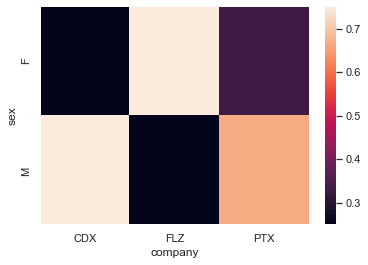

In [115]:
cc=pd.crosstab(df['sex'],df['company'], normalize='columns')
sns.heatmap(cc)

Questa tabella riporta le percentuali di uomini e donne che lavorano in ciascuna compagnia (per es. il 25% dei lavoratori di CDX è donna).

Se vogliamo studiare le relazioni tra più di due variabili categoriche possiamo specificare una lista di colonne quando costruiamo la
crosstab.

In [124]:
pd.crosstab([df['sex'],df['income']],[df['age'],df['company']],normalize='columns')
#sns.heatmap(cg)

age          18   27   28   32        33   35   39   45     
company     CDX  FLZ  PTX  CDX  FLZ  PTX  CDX  FLZ  CDX  PTX
sex income                                                  
F   5000    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    7000    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    8000    0.0  0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0
    11000   0.0  0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0
    12000   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
M   1000    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    2000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
    3000    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
    7000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
    9000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
    10000   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0

Ogni cella di questa crosstab conta il numero di osservazioni che riportano una determinata terna di valori (ad es. un soggetto è di sesso maschile, lavora per PTX e 28 ha anni, mentre due soggetti sono di sesso femminile, lavorano per FLZ e hanno 32 anni).
Oltre a riportare conteggi e frequenze una crosstab permette di calcolare statistiche di terze variabili considerate non categoriche.
Supponiamo di voler conoscere l'età media delle persone di un dato sesso in una data azienda. Possiamo costruire una
crosstab specificando una nuova variabile (age) per <code>values</code>. Dato che di questa variabile bisognerà calcolare un qualche valore
aggregato, dobbiamo anche specificare <code>aggfunc</code> per esempio pari a <code>mean</code>.

In [126]:
pd.crosstab(df['sex'],df['company'], values=df['age'], aggfunc='sum')

company,CDX,FLZ,PTX
sex,,,
F,18,91,33
M,112,39,73


La crosstab indica che l'età media delle persone di sesso maschile che lavorano per CDX è di 37,33 anni.

#### 4.2.7 Manipolazione "esplicita" di DataFrame

In alcuni casi può essere utile trattare i DataFrame "esplicitamente" come matrici di valori. Consideriamo ad esempio il seguente
DataFrame:

In [127]:
df123 = pd.DataFrame({'Category':[1,2,3], 'NumberOfElements':[3,1,2]})
df123

,Category,NumberOfElements
0,1,3
1,2,1
2,3,2


Supponiamo di voler costruire un nuovo DataFrame che, per ogni riga del dataframe df123, contenga esattamente "NumberOfElements"
righe con valore di "NumberOfElements" pari a uno. Vogliamo in pratica "espandere" il DataFrame in questo modo:

In [128]:
df123 = pd.DataFrame({'Category':[1,1,1,2,3,3], 'NumberOfElements':[1,1,1,1,1,1]})
df123

,Category,NumberOfElements
0,1,1
1,1,1
2,1,1
3,2,1
4,3,1
5,3,1


Per farlo in maniera automatica, possiamo trattare il DataFrame più "esplicitamente" come una matrice di valori iterandone le righe. Il
nuovo DataFrame sarà dapprima costruito come una lista di Series (le righe del DataFrame) e poi trasformato in un DataFrame.

In [134]:
newdat = []
for index, row in df123.iterrows(): #iterrows permette di iterare le righe di un DataFrame
    for j in range(row['NumberOfElements']):
        newrow = row.copy()
        newrow['NumberOfElements']+=index*3
        newdat.append(newrow)
pd.DataFrame(newdat)

,Category,NumberOfElements
0,1,1
1,1,4
2,1,7
3,2,10
4,3,13
5,3,16


#### 4.2.8 Input/Output

Pandas mette a disposizione diverse funzioni per leggere e scrivere dati. Vedremo in particolare le funzioni per leggere e scrivere file <i>csv</i>. I file csv possono essere letti, sia in locale che in remoto, tramite il metodo <code>pd.read_csv</code>.

In [ ]:
#https://archive.ics.uci.edu/ml/datasets/iris
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
data.head()

Se non indichiamo alcun parametro, <code>read_csv</code> considererà la prima riga del csv come header.
Se il nostro file csv non contiene un header possiamo utilizzare il parametro <code>header=None</code> per ignorare la prima riga o fornire l'intestazione tramite parametro <code>names=[]</code>.

In [ ]:
#hedaer=None: non consideriamo la prima riga come header
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
data.head()

In [ ]:
#names=[lista nomi colonne]: forniamo i nomi delle colonne
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',  names=['A','B','C','D','E'])
data.head()

In [ ]:
#N.B.: se il numero di colonne indicate non corrisponde al numero di colonne del dataset
#alcune colonne verranno "tagliate" (nel caso in cui la lista di nomi sia inferiore al numero di colonne del dataset)
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',  names=['A','B','C'])
data.head()

In [ ]:
#o aggiunte con valore NaN per ogni riga (nel caso in cui la lista passata a "names" contenga un numero di colonne maggiore)
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',  names=['A','B','C','D','E','F'])
data.head()

In [ ]:
#In alternativa possiamo usare il metodo "coloums" del dataset appena creato
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
data.columns = ['A','B','C','D','E']
data.head()

In [ ]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',\
                 names=['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class'])
data.head()

Possiamo, invece, scrivere un file csv su disco tramite il metodo <code>to_csv</code>.

In [ ]:
data.to_csv('file.csv')

Leggiamo il file appena scritto.

In [ ]:
data=pd.read_csv('file.csv')
data.head()

Come possiamo notare, la prima colonna contiene i valori degli indici, ma non ha nome poiché viene considerata una colonna a tutti gli effetti quando esportiamo il DataFrame su un file csv.

Possiamo risolvere il problema in diversi modi:
<ul>
    <li>Eliminare la colonna "Unnamed: 0" dal DataFrame appena caricato (solo se gli indici sono sequenziali)
    <li>Specificare di usare la colonna "Unnamed: 0" come colonna degli indici durante il caricamento
    <li>Salvare il DataFrame senza indici (solo se gli indici sono sequenziali)
</ul>

In [ ]:
data=pd.read_csv('file.csv')
data.drop('Unnamed: 0', axis=1).head() #eliminiamo la colonna

In [ ]:
#specifichiamo, durante il caricamento, che la colonna "Unnamed: 0" contiene gli indidici
data=pd.read_csv('file.csv', index_col='Unnamed: 0')
data.head() 

In [ ]:
data.to_csv('file.csv', index=False) #salviamo il file senza indici
pd.read_csv('file.csv').head()

## 5 <b>Esempio di manipolazione di dati</b>

Spesso un dataset dev'essere opportunamente trattato prima dell'analisi. Vediamo un esempio di come combinare gli strumenti discussi
finora per manipolare un dataset reale.<br>
Consideriamo il dataset presente su <a href="https://www.kaggle.com/lava18/google-play-store-apps" target="_blank">https://www.kaggle.com/lava18/google-play-store-apps</a> (disponibile per il download)

In [135]:
data = pd.read_csv('googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Visualizziamo le proprietà del dataset.

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Il dataset contiene osservazioni e variabili. Osserviamo che molte delle variabili (tranne "Rating") sono di tipo "object", anche se
rappresentano dei valori numerici (es., Reviews, Size, Installs e Price). Osservando le prime righe del DataFrame visualizzate sopra
possiamo dedurre che:
<ul>
    <li>Size non è rappresentato come valore numerico in quanto contiene l'unità di misura "M";
    <li>Installs è in realtà una variabile categorica (riporta un "+" alla fine, quindi indica la classe "più di n installazioni");
</ul>
Non ci sono motivazioni apparenti per cui Reviews e Rating non siano stati interpretati come numeri. Costruiamo una funzione filtro che
identifichi se un valore è convertibile in un dato tipo o meno.

In [137]:
def cannot_convert(x, t=float):
    try:
        t(x)
        return False
    except:
        return True
print(cannot_convert('12'))
print(cannot_convert('12f'))

False
True


Applichiamo il filtro alla colonna Review per visualizzare i valori che non possono essere convertiti.

In [141]:
list(filter(cannot_convert,data['App']))

['Photo Editor & Candy Camera & Grid & ScrapBook',
 'Coloring book moana',
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps',
 'Sketch - Draw & Paint',
 'Pixel Draw - Number Art Coloring Book',
 'Paper flowers instructions',
 'Smoke Effect Photo Maker - Smoke Editor',
 'Infinite Painter',
 'Garden Coloring Book',
 'Kids Paint Free - Drawing Fun',
 'Text on Photo - Fonteee',
 'Name Art Photo Editor - Focus n Filters',
 'Tattoo Name On My Photo Editor',
 'Mandala Coloring Book',
 '3D Color Pixel by Number - Sandbox Art Coloring',
 'Learn To Draw Kawaii Characters',
 'Photo Designer - Write your name with shapes',
 '350 Diy Room Decor Ideas',
 'FlipaClip - Cartoon animation',
 'ibis Paint X',
 'Logo Maker - Small Business',
 "Boys Photo Editor - Six Pack & Men's Suit",
 'Superheroes Wallpapers | 4K Backgrounds',
 'Mcqueen Coloring pages',
 'HD Mickey Minnie Wallpapers',
 'Harley Quinn wallpapers HD',
 'Colorfit - Drawing & Coloring',
 'Animated Photo Editor',
 'Pencil Sketch Drawing',

Sostituiamo il valore trova con una versione numerica tramite il metodo <code>replace</code>.

In [139]:
data['Reviews']=data['Reviews'].replace({'3.0M':3000000})

A questo punto possiamo convertire i valori della colonna in interi.

In [140]:
data['Reviews']=data['Reviews'].astype(int)

Visualizziamo nuovamente le informazioni del DataFrame.

In [ ]:
data.info()

Reviews è adesso un intero. Eseguiamo un lavoro simile sulla variabile Price.

In [142]:
list(filter(cannot_convert, data['Price']))[:10] #visualizziamo solo i primi 10 elementi

['$4.99',
 '$4.99',
 '$4.99',
 '$4.99',
 '$3.99',
 '$3.99',
 '$6.99',
 '$1.49',
 '$2.99',
 '$3.99']

Possiamo convertire le stringhe in float eliminando il dollaro iniziale mediante <code>apply</code>.

In [144]:
def strip_dollar(x):
    if x[0]=='$':
        return x[1:]
    else:
        return x
data['Price']=data['Price'].apply(strip_dollar)

Vediamo se ci sono ancora valori che non possono essere convertiti.

In [145]:
list(filter(cannot_convert, data['Price']))

['Everyone']

Dato che non sappiamo come interpretare il valore "Everyone", lo sostituiremo con un NaN.

In [146]:
data['Price']=data['Price'].replace({'Everyone':np.nan})

Adesso possiamo procedere alla conversione in float.

In [147]:
data['Price']=data['Price'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int32  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.0+ MB


Modifichiamo anche "Size" eliminando la "M" finale.

In [148]:
data['Size']=data['Size'].apply(lambda x : x[:-1])

Verifichiamo l'esistenza di valori non convertibili.

In [149]:
list(filter(cannot_convert,data['Size']))[:10]

['Varies with devic',
 'Varies with devic',
 'Varies with devic',
 'Varies with devic',
 'Varies with devic',
 'Varies with devic',
 'Varies with devic',
 'Varies with devic',
 'Varies with devic',
 'Varies with devic']

Sostituiamo questi valori con NaN.

In [150]:
data['Size']=data['Size'].replace({'Varies with devic':np.nan})

Verifichiamo nuovamente la presenza di valori che non possono essere convertiti.

In [154]:
list(filter(cannot_convert,data['Size']))

[]

Possiamo rimuovere la virgola usata per indicare le migliaia e convertire in float.

In [155]:
data['Size']=data['Size'].apply(lambda x: float(str(x).replace(',','')))

In [ ]:
data.info()

Valutiamo se è il caso di trasformare anche "Installs" in un valore numerico. Vediamo quanti valori univoci di "Installs" ci sono nel dataset.

In [156]:
data['Installs'].nunique()

22

Abbiamo solo 22 valori, che paragonati alle 10841 osservazioni ci suggeriscono di considerare "Installs" come variabile categorica e non come valore numerico.<br>
Il DataFrame contiene dei NaN che possiamo tenere o scartare. In questo caso, che i dati sono molti, possiamo rimuoverli
tramite <code>dropna</code>.

Adesso possiamo iniziare a esplorare i dati con gli strumenti visti finora.

Visualizziamo ad esempio i valori medi delle variabili numeriche per <i>categoria (Category)</i>.

In [157]:
data.groupby('Category').mean()

,Rating,Reviews,Size,Price
Category,,,,
1.9,19.000000,3.000000e+06,1000.000000,NaN
ART_AND_DESIGN,4.358065,2.637600e+04,12.370968,0.091846
AUTO_AND_VEHICLES,4.190411,1.369019e+04,34.502667,0.158471
BEAUTY,4.278571,7.476226e+03,13.795745,0.000000
BOOKS_AND_REFERENCE,4.346067,9.506090e+04,40.349746,0.518485
BUSINESS,4.121452,3.033598e+04,26.622500,0.402761
COMICS,4.155172,5.638793e+04,34.111765,0.000000
COMMUNICATION,4.158537,2.107138e+06,55.786792,0.214832
DATING,3.970769,3.115931e+04,16.710377,0.134316
